# Lab | Data Cleaning and Formatting

In this lab, we will be working with the customer data from an insurance company, which can be found in the CSV file located at the following link: https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv


# Challenge 1: Data Cleaning and Formatting

## Exercise 1: Cleaning Column Names

To ensure consistency and ease of use, standardize the column names of the dataframe. Start by taking a first look at the dataframe and identifying any column names that need to be modified. Use appropriate naming conventions and make sure that column names are descriptive and informative.

*Hint*:
- *Column names should be in lower case*
- *White spaces in column names should be replaced by `_`*
- *`st` could be replaced for `state`*

In [1]:
# Your code here
import pandas as pd
import numpy as np
url="https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv"
insurance_customers_df=pd.read_csv(url)


In [2]:
#To work better with our columns we are going to convert the titles to lowercase 
insurance_customers_df.columns=map(str.lower,insurance_customers_df.columns)

In [3]:
#And remove the blank space btw words
insurance_customers_df.columns=insurance_customers_df.columns.str.replace(" ","_")

In [4]:
#Change  st for state 
insurance_customers_df['st']=insurance_customers_df['st'].str.replace('st','state')

## Exercise 2: Cleaning invalid Values

The dataset contains columns with inconsistent and incorrect values that could affect the accuracy of our analysis. Therefore, we need to clean these columns to ensure that they only contain valid data.

Note that this exercise will focus only on cleaning inconsistent values and will not involve handling null values (NaN or None).

*Hint*:
- *Gender column contains various inconsistent values such as "F", "M", "Femal", "Male", "female", which need to be standardized, for example, to "M" and "F".*
- *State abbreviations be can replaced with its full name, for example "AZ": "Arizona", "Cali": "California", "WA": "Washington"*
- *In education, "Bachelors" could be replaced by "Bachelor"*
- *In Customer Lifetime Value, delete the `%` character*
- *In vehicle class, "Sports Car", "Luxury SUV" and "Luxury Car" could be replaced by "Luxury"*

In [5]:
# Standarize gender column to "F" and "M"
insurance_customers_df['gender'].replace({'Femal': 'F', 'female': 'F', 'Male': 'M'}, inplace=True)

In [6]:
#Standarize education column, when "Bachelors" change for "Bachelor"
insurance_customers_df['education'].replace({'Bachelors': 'Bachelor'}, inplace=True)

In [7]:
#Standarize vehicle_class column
# "Sports Car", "Luxury SUV", "Luxury Car" replace with "Luxury"
insurance_customers_df['vehicle_class'].replace({'Sports Car': 'Luxury', 'Luxury SUV': 'Luxury', 'Luxury Car': 'Luxury'}, inplace=True)

In [8]:
#Delete the % character from customer lifetime value column
insurance_customers_df['customer_lifetime_value'].str.replace('%','').astype(float)/100

0              NaN
1        6979.5359
2       12887.4317
3        7645.8618
4        5363.0765
           ...    
4003           NaN
4004           NaN
4005           NaN
4006           NaN
4007           NaN
Name: customer_lifetime_value, Length: 4008, dtype: float64

In [9]:
#Let's check the columns with changes
#Gender column
insurance_customers_df['gender'].unique()
print(insurance_customers_df['gender'].unique())
#The changes have been made, or values are 'F' , 'M' and nan values (to be clean later on)


[nan 'F' 'M']


In [10]:
#Let's check the columns with changes
#education column
insurance_customers_df['education'].unique()
print(insurance_customers_df['education'].unique())
#The changes have been done succesfully
#Note : there are nan values to adress later on

['Master' 'Bachelor' 'High School or Below' 'College' 'Doctor' nan]


In [11]:
#Let's check the columns with changes
#Vehicle class column
insurance_customers_df['vehicle_class'].unique()
print(insurance_customers_df['vehicle_class'].unique())
#The changes have been done succesfully
#Note : there are nan values to adress later on

['Four-Door Car' 'Two-Door Car' 'SUV' 'Luxury' nan]


In [12]:
#Let's check the columns with changes
#customer lifetime value column
insurance_customers_df['customer_lifetime_value'].unique()
print(insurance_customers_df['customer_lifetime_value'].unique())

[nan '697953.59%' '1288743.17%' ... '2031499.76%' '323912.47%'
 '899704.02%']


In [13]:
#Change state abbreviations to full name
change_states={'AZ': 'Arizona', 'Cali': 'California', 'WA': 'Washington'}
insurance_customers_df['st']=insurance_customers_df['st'].replace(change_states)

In [14]:
insurance_customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4008 entries, 0 to 4007
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer                   1071 non-null   object 
 1   st                         1071 non-null   object 
 2   gender                     954 non-null    object 
 3   education                  1071 non-null   object 
 4   customer_lifetime_value    1068 non-null   object 
 5   income                     1071 non-null   float64
 6   monthly_premium_auto       1071 non-null   float64
 7   number_of_open_complaints  1071 non-null   object 
 8   policy_type                1071 non-null   object 
 9   vehicle_class              1071 non-null   object 
 10  total_claim_amount         1071 non-null   float64
dtypes: float64(3), object(8)
memory usage: 344.6+ KB


## Exercise 3: Formatting data types

The data types of many columns in the dataset appear to be incorrect. This could impact the accuracy of our analysis. To ensure accurate analysis, we need to correct the data types of these columns. Please update the data types of the columns as appropriate.

It is important to note that this exercise does not involve handling null values (NaN or None).

*Hint*:
- *Customer lifetime value should be numeric*
- *Number of open complaints has an incorrect format. Look at the different values it takes with `unique()` and take the middle value. As an example, 1/5/00 should be 5. Number of open complaints is a string - remember you can use `split()` to deal with it and take the number you need. Finally, since it should be numeric, cast the column to be in its proper type.*

In [15]:
#Observe the characteristics of the variable Number of Open Complaints with unique()
insurance_customers_df['number_of_open_complaints'].unique()

array(['1/0/00', '1/2/00', '1/1/00', '1/3/00', '1/5/00', '1/4/00', nan],
      dtype=object)

In [16]:
#Using only the number on the middle
#link:https://pandas.pydata.org/docs/reference/api/pandas.Series.str.split.html#pandas.Series.str.split
insurance_customers_df['number_of_open_complaints'] = insurance_customers_df['number_of_open_complaints'].astype(str).str.split("/").str[1]




In [17]:
#We can check how the column is transforming
insurance_customers_df['number_of_open_complaints'].unique()

array(['0', '2', '1', '3', '5', '4', nan], dtype=object)

## Exercise 4: Dealing with Null values

Identify any columns with null or missing values. Identify how many null values each column has. You can use the `isnull()` function in pandas to find columns with null values.

Decide on a strategy for handling the null values. There are several options, including:

- Drop the rows or columns with null values
- Fill the null values with a specific value (such as the column mean or median for numerical variables, and mode for categorical variables)
- Fill the null values with the previous or next value in the column
- Fill the null values based on a more complex algorithm or model (note: we haven't covered this yet)

Implement your chosen strategy to handle the null values. You can use the `fillna()` function in pandas to fill null values or `dropna()` function to drop null values.

Verify that your strategy has successfully handled the null values. You can use the `isnull()` function again to check if there are still null values in the dataset.

Remember to document your process and explain your reasoning for choosing a particular strategy for handling null values.

After formatting data types, as a last step, convert all the numeric variables to integers.

In [18]:
#Checking for Nan values in each column
insurance_customers_df.isna().any()
#As we can see all columns have Nan values 

customer                     True
st                           True
gender                       True
education                    True
customer_lifetime_value      True
income                       True
monthly_premium_auto         True
number_of_open_complaints    True
policy_type                  True
vehicle_class                True
total_claim_amount           True
dtype: bool

In [19]:
#It's is useful to know how many Nan values are in each column
insurance_customers_df.isna().sum()
#The number of Nan values is high in all cases, close to 70% 
#The column with more Nan values is the 'gender' column
#Deleting such a high number of datapoints could potentially harm our analysis



customer                     2937
st                           2937
gender                       3054
education                    2937
customer_lifetime_value      2940
income                       2937
monthly_premium_auto         2937
number_of_open_complaints    2937
policy_type                  2937
vehicle_class                2937
total_claim_amount           2937
dtype: int64

In [20]:
#Thoughts going forward
#We want to save as much information as possible.
#At the same time if there are too many missing values for the same observation, it's not worth saving it
#link:https://saturncloud.io/blog/how-to-count-the-number-of-missingnan-values-in-each-row-in-python-pandas/#:~:text=(axis%3D1)-,To%20count%20the%20number%20of%20missing%2FNaN%20values%20in%20each,True%20indicates%20a%20missing%20value.
row_nan_count = insurance_customers_df.isna().sum(axis=1)

print(row_nan_count)

0        2
1        0
2        0
3        0
4        0
        ..
4003    11
4004    11
4005    11
4006    11
4007    11
Length: 4008, dtype: int64


In [21]:
#As we can see there are observations with all their values blank and some with just one or two
#We can set a limit, if they have more than five values, they are dropped
#link:https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html
insurance_customers_df=insurance_customers_df.dropna(thresh=6) # Keep only the rows with at least 6 non-NA values

In [22]:
#Let's check again if we have any Nan values to clean
insurance_customers_df.isna().any()
#We can see that we still have Nan values in the columns 'gender' and 'customer lifetime value'


customer                     False
st                           False
gender                        True
education                    False
customer_lifetime_value       True
income                       False
monthly_premium_auto         False
number_of_open_complaints    False
policy_type                  False
vehicle_class                False
total_claim_amount           False
dtype: bool

In [23]:
#It's is useful to know how many Nan values are in each column
insurance_customers_df.isna().sum()

customer                       0
st                             0
gender                       117
education                      0
customer_lifetime_value        3
income                         0
monthly_premium_auto           0
number_of_open_complaints      0
policy_type                    0
vehicle_class                  0
total_claim_amount             0
dtype: int64

## Exercise 5: Dealing with duplicates

Use the `.duplicated()` method to identify any duplicate rows in the dataframe.

Decide on a strategy for handling the duplicates. Options include:
- Dropping all duplicate rows
- Keeping only the first occurrence of each duplicated row
- Keeping only the last occurrence of each duplicated row
- Dropping duplicates based on a subset of columns
- Dropping duplicates based on a specific column

Implement your chosen strategy using the `drop_duplicates()` function.

Verify that your strategy has successfully handled the duplicates by checking for duplicates again using `.duplicated()`.

Remember to document your process and explain your reasoning for choosing a particular strategy for handling duplicates.

Save the cleaned dataset to a new CSV file.

*Hint*: *after dropping duplicates, reset the index to ensure consistency*.

In [24]:
insurance_customers_df=insurance_customers_df.drop_duplicates(keep='last')

In [25]:
insurance_customers_df.to_csv("insurance_customers_df_clean.csv")

# Bonus: Challenge 2: creating functions on a separate `py` file

Put all the data cleaning and formatting steps into functions, and create a main function that performs all the cleaning and formatting.

Write these functions in separate .py file(s). By putting these steps into functions, we can make the code more modular and easier to maintain.

*Hint: autoreload module is a utility module in Python that allows you to automatically reload modules in the current session when changes are made to the source code. This can be useful in situations where you are actively developing code and want to see the effects of changes you make without having to constantly restart the Python interpreter or Jupyter Notebook kernel.*

In [26]:
# Your code here

# Bonus: Challenge 3: Analyzing Clean and Formated Data

You have been tasked with analyzing the data to identify potential areas for improving customer retention and profitability. Your goal is to identify customers with a high policy claim amount and a low customer lifetime value.

In the Pandas Lab, we only looked at high policy claim amounts because we couldn't look into low customer lifetime values. If we had tried to work with that column, we wouldn't have been able to because customer lifetime value wasn't clean and in its proper format. So after cleaning and formatting the data, let's get some more interesting insights!

Instructions:

- Review the statistics again for total claim amount and customer lifetime value to gain an understanding of the data.
- To identify potential areas for improving customer retention and profitability, we want to focus on customers with a high policy claim amount and a low customer lifetime value. Consider customers with a high policy claim amount to be those in the top 25% of the total claim amount, and clients with a low customer lifetime value to be those in the bottom 25% of the customer lifetime value. Create a pandas DataFrame object that contains information about customers with a policy claim amount greater than the 75th percentile and a customer lifetime value in the bottom 25th percentile.
- Use DataFrame methods to calculate summary statistics about the high policy claim amount and low customer lifetime value data. To do so, select both columns of the dataframe simultaneously and pass it to the `.describe()` method. This will give you descriptive statistics, such as mean, median, standard deviation, minimum and maximum values for both columns at the same time, allowing you to compare and analyze their characteristics.

In [27]:
# Your code here

In [28]:
#Get the data
#For this lab, we will continue using the csv file that was downloaded in the previous lab as well as the Jupyter Notebook.


#EDA (Exploratory Data Analysis) - Complete the following tasks to explore the data:
#Show DataFrame info.
#Describe DataFrame.
#Show a plot of the Gender breakdown.
#Show a plot of Income by State.
#Show a plot of the Policy Type by the Total Claim Amount.
#Show a plot of the Education by Vehicle Class.
#What insights can you establish from these plots?
#What other plots do you feel would be beneficial?

In [29]:
#Use the clean dataframe from the previous exercise


In [30]:
#Show DataFrame info.
insurance_customers_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1071 entries, 0 to 1070
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer                   1071 non-null   object 
 1   st                         1071 non-null   object 
 2   gender                     954 non-null    object 
 3   education                  1071 non-null   object 
 4   customer_lifetime_value    1068 non-null   object 
 5   income                     1071 non-null   float64
 6   monthly_premium_auto       1071 non-null   float64
 7   number_of_open_complaints  1071 non-null   object 
 8   policy_type                1071 non-null   object 
 9   vehicle_class              1071 non-null   object 
 10  total_claim_amount         1071 non-null   float64
dtypes: float64(3), object(8)
memory usage: 100.4+ KB


In [31]:
#Describe DataFrame.
insurance_customers_df.describe()


,income,monthly_premium_auto,total_claim_amount
count,1071.000000,1071.000000,1071.000000
mean,39295.701214,193.234360,404.986909
std,30469.427060,1601.190369,293.027260
min,0.000000,61.000000,0.382107
25%,14072.000000,68.000000,202.157702
50%,36234.000000,83.000000,354.729129
75%,64631.000000,109.500000,532.800000
max,99960.000000,35354.000000,2893.239678


In [32]:
#Before using graphs, import the necessary tools

import matplotlib.pyplot as plt
import seaborn as sns

[Text(0, 0, 'Male'), Text(1, 0, 'Female')]

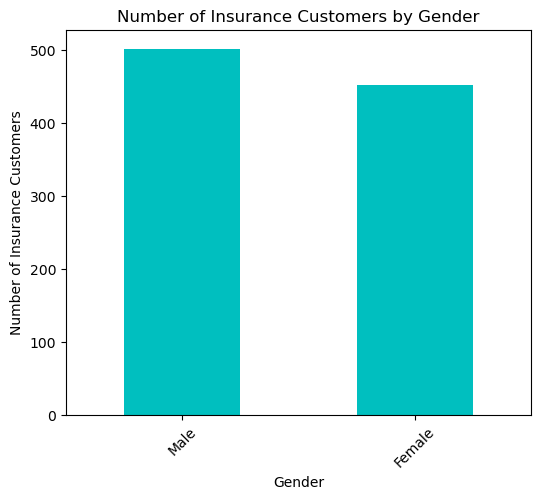

In [33]:
#Show a plot of the Gender breakdown.
#link :https://stackoverflow.com/questions/70664177/better-way-to-plot-gender-count-using-python
gender = insurance_customers_df['gender'].value_counts()
plt.figure(figsize=(6, 5))
ax = gender.plot(kind='bar', rot=45, color="c")
ax.set_title("Number of Insurance Customers by Gender", y = 1)
ax.set_xlabel('Gender')
ax.set_ylabel('Number of Insurance Customers')
ax.set_xticklabels(('Male', 'Female'))
#Looking at the graph we can see that there isn't a great difference btw 'female' and 'male'.
#A possibility explaining the difference is that some families might have just one car, and the policy is under the husband's name.

Text(0, 0.5, 'State')

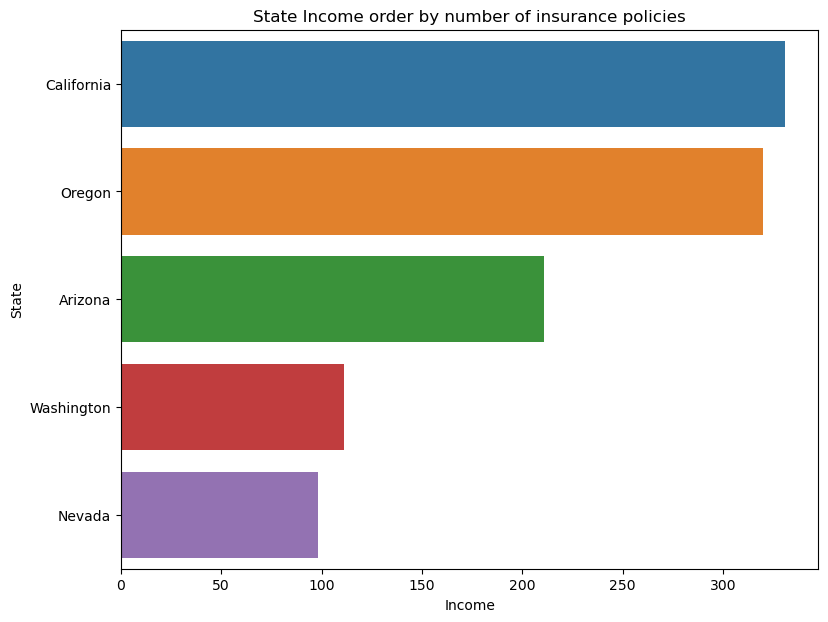

In [34]:
#Show a plot of Income by State.
#Note: using a 9:7 size chart instead of the previous 6:5 because there are more variables
st_order = insurance_customers_df['st'].value_counts().head(5).index
plt.figure(figsize=(9, 7))
sns.countplot(data=insurance_customers_df, y='st', order=st_order)
plt.title('State Income order by number of insurance policies')
plt.xlabel('Income')
plt.ylabel('State')
#link: https://www.analyticsvidhya.com/blog/2021/08/understanding-bar-plots-in-python-beginners-guide-to-data-visualization/

In [35]:
#Checking the order of the graph 
insurance_customers_df['st'].value_counts()
#Observation 1: the state with the largest number of insurance policies is the state with the largest income
#Observation 2: Oregon and California have pretty similar numbers
#Observation 3: Washington and Nevada have similar numbers
#Observation 4: Arizona has mid-tier values, that do not asimilate to the other two groups
#IDEAS to explore: Maybe there are three sub-categories: high, medium and low 

st
California    331
Oregon        320
Arizona       211
Washington    111
Nevada         98
Name: count, dtype: int64

Text(0, 0.5, 'Total claim amount(mean)')

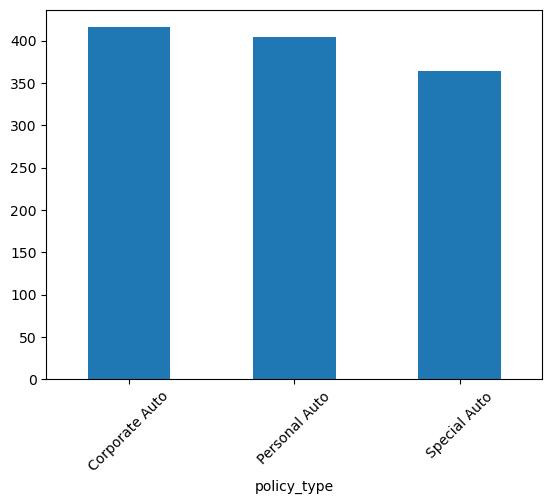

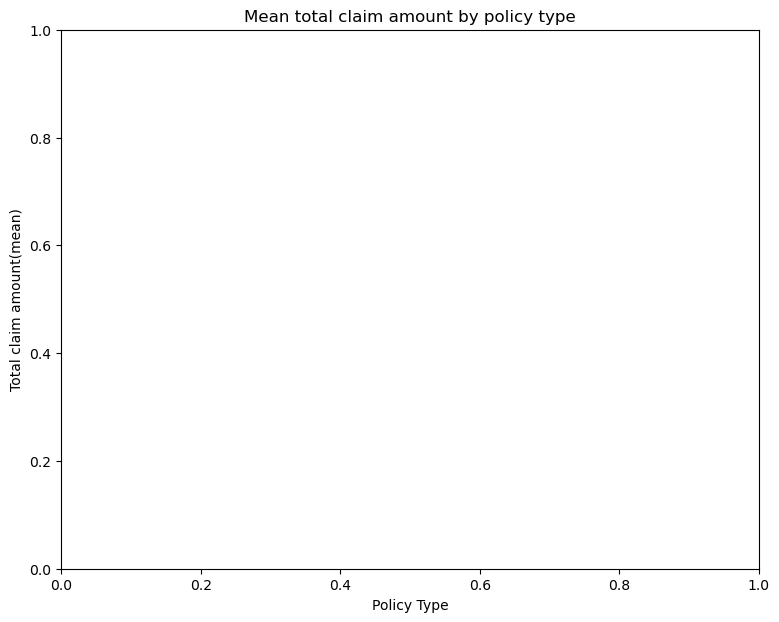

In [36]:
#Show a plot of Total Claim Amount by policy type.
#Note: mainteining size chart (9:7)
insurance_customers_df = insurance_customers_df.groupby(['policy_type'])['total_claim_amount'].mean()
ax = insurance_customers_df.plot.bar(x='policy_type', y='total_claim_amount(mean values)', rot=45)
plt.figure(figsize=(9, 7))
plt.title('Mean total claim amount by policy type')
plt.xlabel('Policy Type')
plt.ylabel('Total claim amount(mean)')
#Observation 1: The isn't a drastic difference btw policy types
#Observation 2: We are missing the 'luxury' category, that has been drop because it had to many missing values
#Thoughts : it would be intersting to explore the luxury category alone, also i might be intersting to break down this graph by state

In [37]:
#Show a plot of the Education by Vehicle Class.
sns.scatterplot(x='vehicle_class',y='education',data=insurance_customers_df)
plt.show()


ValueError: Could not interpret value `vehicle_class` for parameter `x`

In [ ]:
#What insights can you establish from these plots?
#There is a strong difference in income by state
#The average claim amount is not so sensitive to the policy type, the corporate premium is small
#The difference btw women and men is small; but I might by good to check if this holds the same in all markets (states)



In [ ]:
#What other plots do you feel would be beneficial?
#It would be benefitial to do an histogram plot for each variable, to learn their distribution and see if there are outliers
#It would be beneficial to analyze the correlation btw variables